In [163]:
# Import Dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "https://raw.githubusercontent.com/laurahallaman1/Matplotlib-Challenge/master/data/mouse_drug_data.csv"
clinical_trial_data = "https://raw.githubusercontent.com/laurahallaman1/Matplotlib-Challenge/master/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data)
clinical_data = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
clinical_trial_dataset = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_trial_dataset.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [164]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = clinical_trial_dataset.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)

# Preview DataFrame
mean_tumor_vol.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [165]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_tumor_volume = clinical_trial_dataset.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
SEM_tumor_volume = pd.DataFrame(SEM_tumor_volume)

# Preview DataFrame
SEM_tumor_volume.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [166]:
SEM_tumor_volume.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [167]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol = mean_tumor_vol.reset_index()
mean_tumor_vol_pivot = mean_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

SEM_tumor_volume = SEM_tumor_volume.reset_index()
SEM_tumor_volume_pivot = SEM_tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]


mean_tumor_vol_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


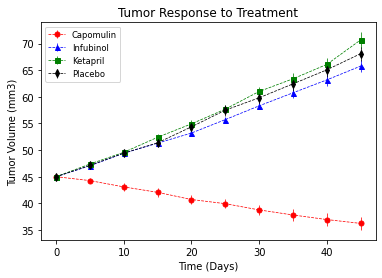

In [168]:
# Import Dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Capomulin"], yerr=SEM_tumor_volume_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Infubinol"], yerr=SEM_tumor_volume_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Ketapril"], yerr=SEM_tumor_volume_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Placebo"], yerr=SEM_tumor_volume_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.75)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small")

# Show the Figure
plt.show()

# Save the Figure



In [0]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [170]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_site_data = clinical_trial_dataset.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_site_data = pd.DataFrame(mean_site_data)

# Preview DataFrame
mean_site_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [171]:

# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

SEM_site_data = clinical_trial_dataset.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

SEM_site_data = pd.DataFrame(SEM_site_data)

SEM_site_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [172]:
# Minor Data Munging to Re-Format the Data Frames
mean_site_data = mean_site_data.reset_index()
mean_site_data_pivot = mean_site_data.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

SEM_site_data = SEM_site_data.reset_index()
SEM_site_data_pivot = SEM_site_data.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
mean_site_data_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


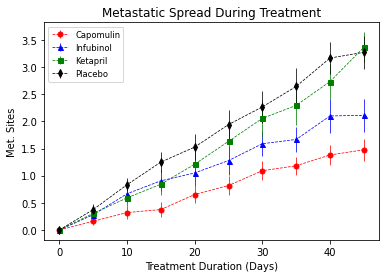

In [173]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_site_data_pivot.index, mean_site_data_pivot["Capomulin"], yerr=SEM_site_data_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_site_data_pivot.index, mean_site_data_pivot["Infubinol"], yerr=SEM_site_data_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_site_data_pivot.index, mean_site_data_pivot["Ketapril"], yerr=SEM_site_data_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_site_data_pivot.index, mean_site_data_pivot["Placebo"], yerr=SEM_site_data_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.75)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small")

# Save the Figure

# Show the Figure
plt.show()

## Survival Rates

In [174]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = clinical_trial_dataset.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_rate = pd.DataFrame({"Mouse Count": survival_rate})

# Preview DataFrame
survival_rate.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [175]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate = survival_rate.reset_index()
survival_rate_xy = survival_rate.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_rate_xy.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


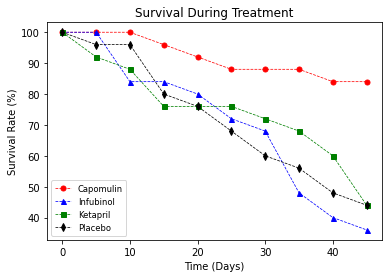

In [176]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_rate_xy["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.75)
plt.plot(100 * survival_rate_xy["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.75)
plt.plot(100 * survival_rate_xy["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.75)
plt.plot(100 * survival_rate_xy["Placebo"] / 25 , "kd", linestyle="dashed", markersize=5, linewidth=0.75)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small")

# Show the Figure
plt.show()

# Save the Figure



## Summary Bar Graph

In [177]:
# Calculate the percent changes for each drug
percent_change_a = survival_rate_xy.groupby(["Capomulin"]).pct_change()
percent_change_b = survival_rate_xy.groupby(["Infubinol"]).pct_change()
percent_change_c = survival_rate_xy.groupby(["Ketapril"]).pct_change()
percent_change_d = survival_rate_xy.groupby(["Placebo"]).pct_change()



# Display the data to confirm
percent_change = percent_change_a.dropna
percent_change



<bound method DataFrame.dropna of            Ceftamin  Infubinol  Ketapril  ...  Ramicane  Stelasyn  Zoniferol
Timepoint                                 ...                               
0               NaN        NaN       NaN  ...       NaN       NaN        NaN
5         -0.160000   0.000000 -0.080000  ...  0.000000 -0.038462  -0.040000
10        -0.047619  -0.160000 -0.043478  ... -0.040000 -0.080000  -0.083333
15              NaN        NaN       NaN  ...       NaN       NaN        NaN
20              NaN        NaN       NaN  ...       NaN       NaN        NaN
25              NaN        NaN       NaN  ...       NaN       NaN        NaN
30        -0.111111  -0.055556 -0.052632  ...  0.000000 -0.052632  -0.062500
35        -0.125000  -0.294118 -0.055556  ... -0.086957 -0.111111  -0.066667
40              NaN        NaN       NaN  ...       NaN       NaN        NaN
45        -0.071429  -0.100000 -0.266667  ...  0.000000 -0.083333   0.000000

[10 rows x 9 columns]>

Text(0, 0.5, 'Percent Tumor Volume Change')

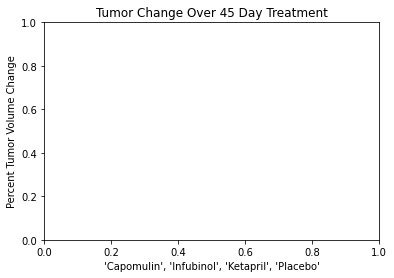

In [180]:
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("'Capomulin', 'Infubinol', 'Ketapril', 'Placebo'")
plt.ylabel("Percent Tumor Volume Change")





3 observations: 
Ketaphril had the highest tumor response
It also had the highest metastatic spread, and tied for second lowest survival rate 
Capomulin had the highest survival rate, but the lowest tumor response. 
Capomulin also had the lowest metastatic spread. 
One takeaway from this study might be that some drugs such as Ketaphril might be more appropriate to be used for short, aggressive treatement and ones such as Capomulin could be used over longer courses of treatment where preventing metastatic spread is a main goal. 
